In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import helpfunction as helper
from __future__ import division

import collections

Welcome to JupyROOT 6.10/08


In [2]:
#inputdir = '/home/tmettler/Desktop/ub_data/ub_xsec/ConsolidatedSliceAnalyser/ext/'

# CRTinBNB tagger, Overlay or MC

In [3]:
fidvol_vtx = [10,10,10,10,10,50] 
fidvol_end = [5,5,5,5,5,5]

lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]


mass_mu = 0.106
kin_min = 0.02
kin_min_mu = kin_min + mass_mu

gr = (1 + 5 ** 0.5) / 2

In [4]:
def eventHash(df):
    return df.apply(lambda x: hash(tuple(x)), axis = 1)

def inTPC_mask(df, str_x, str_y, str_z, fidvol=[0]*6):
    global upper, lower
    mask_x = df[str_x].between(lower[0]+fidvol[0], upper[0]-fidvol[1])
    mask_y = df[str_y].between(lower[1]+fidvol[2], upper[1]-fidvol[3])
    mask_z = df[str_z].between(lower[2]+fidvol[4], upper[2]-fidvol[5])
    mask = mask_x & mask_y & mask_z
    return mask

def inTPC_df(df, str_x, str_y, str_z, fidvol=[0]*6):
    mask = inTPC_mask(df, str_x, str_y, str_z, fidvol)
    return df[mask]

In [5]:
# mcc9.1
#inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/'
#outputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/trackidentifier_plots/' 
#filename_overlay = 'NuCCana_1_QP_overlay.root'
#filename_data = 'NuCCana_BnbAll_QP.root'
#filename_ext = 'NuCCana_ExtAll_QP.root'

inputdir = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/'
outputdir = inputdir+'NumuCC_cut_dev/' 
outputdir_png = inputdir+'NumuCC_cut_dev/png/' 
outputdir_root = inputdir+'NumuCC_cut_dev/root/' 
#filename_overlay = 'NuCCana_uncorr_overlay_all.root'
filename_overlay = 'NuCCana_overlay_V2.root'
filename_data = 'NuCCana_data_V2.root'
filename_ext = 'NuCCana_ext_V2.root'
filename_dirt = 'NuCCana_dirt_V2.root'

#inputdir2 = '/home/tmettler/Desktop/ub_data/mcc9.1/numuana_uncorr/'
#filename_dirt = 'NuCCana_run3_dirt_V18_e50000.root'


try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)
try:
    os.stat(outputdir_png)
except:
    os.mkdir(outputdir_png)
try:
    os.stat(outputdir_root)
except:
    os.mkdir(outputdir_root)
    
isMC = 1
tree_name = 'numuCCAna'

In [6]:
overlay = ROOT.TChain(tree_name + "/event","event")
overlay.Add( inputdir + filename_overlay)
data = ROOT.TChain(tree_name + "/event","event")
data.Add( inputdir + filename_data)
ext = ROOT.TChain(tree_name + "/event","event")
ext.Add( inputdir + filename_ext)
dirt = ROOT.TChain(tree_name + "/event","event")
dirt.Add( inputdir + filename_dirt)
print "Overlay: Number of Entries:", overlay.GetEntries()
print "Data: Number of Entries:", data.GetEntries()
print "Ext: Number of Entries:", ext.GetEntries()
print "Dirt: Number of Entries:", dirt.GetEntries()

overlay_pot = ROOT.TChain(tree_name + "/pottree","pottree")
overlay_pot.Add( inputdir + filename_overlay)
h_x = ROOT.TH1F("h_x","Pot",1000,0,1e22)
overlay_pot.Draw('pot>>h_x','1')
mean_pot = h_x.GetMean()
entries_pot = h_x.GetEntries()

pot_overlay = mean_pot*entries_pot
print 'Overlay POT: ', pot_overlay #, entries_pot, mean_pot

dirt_pot = ROOT.TChain(tree_name + "/pottree","pottree")
dirt_pot.Add( inputdir + filename_dirt)
h_x = ROOT.TH1F("h_x","Pot",1000,0,1e22)
dirt_pot.Draw('pot>>h_x','1')
mean_pot_dirt = h_x.GetMean()
entries_pot_dirt = h_x.GetEntries()

dirt_pot = mean_pot_dirt*entries_pot_dirt
print 'Dirt POT: ', dirt_pot #, entries_pot, mean_pot

#pot_data =     8.227e+18 # tor860_wcut
#data_trigger = 1987072 #4743794 # 1987072.0 # E1DCNT_wcut
#ext_trigger =  5685315 #2120135 #5685315 # EXT

pot_data =     4.643e+18 # tor860_wcut
data_trigger = 1127075.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  17427748.0  #2120135 #5685315 # EXT

scale_ext = data_trigger/ext_trigger
scale_overlay = pot_data/pot_overlay
scale_dirt = pot_data/dirt_pot
print 'Scalefactors: '
print 'Ext: ', scale_ext
print 'Overlay: ', scale_overlay
print 'Dirt: ', scale_dirt

# uncomment one of them
cutname = 'has_nuslice'
cut = ' && ' + cutname
#cut = ''

title_cut = ''
if(cut!=''):
    title_cut = ' with '+ cutname
    

Overlay: Number of Entries: 967268
Data: Number of Entries: 20131
Ext: Number of Entries: 203469
Dirt: Number of Entries: 96465
Overlay POT:  1.21191661343e+21
Dirt POT:  2.9866803255e+20
Scalefactors: 
Ext:  0.0646712931585
Overlay:  0.00383112167003
Dirt:  0.0155456878339


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TROOT::Append>: Replacing existing TH1: h_x (Potential memory leak).


In [7]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("","",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [8]:
file_tree = {}
dict_names = ['overlay','on','off']

file_tree['overlay'] = {}
file_tree['overlay']['event'] = uproot.open(inputdir+filename_overlay)[tree_name+'/event']

file_tree['dirt'] = {}
file_tree['dirt']['event'] = uproot.open(inputdir+filename_dirt)[tree_name+'/event']

file_tree['on'] = {}
file_tree['on']['event'] = uproot.open(inputdir+filename_data)[tree_name+'/event']

file_tree['off'] = {}
file_tree['off']['event'] = uproot.open(inputdir+filename_ext)[tree_name+'/event']


print 'length of event overlay', file_tree['overlay']['event'].numentries
print 'length of event dirt', file_tree['dirt']['event'].numentries
print 'length of event on', file_tree['on']['event'].numentries
print 'length of event off', file_tree['off']['event'].numentries

length of event overlay 967268
length of event dirt 96465
length of event on 20131
length of event off 203469


In [9]:
for name in file_tree['overlay'] :
    print
    print('*** ', name, ' ***')
    print([c.decode('UTF-8') for c in file_tree['overlay'][name].keys()])


('*** ', 'event', ' ***')
[u'event_counter', u'frunNum', u'fsubRunNum', u'fEvtNum', u'TriTim_sec', u'TriTim_nsec', u'NuScore', u'FlashScore', u'FlashScoreTime', u'NuPDG', u'NumPfp', u'NuTracks', u'NuShowers', u'Nu_Vx', u'Nu_Vy', u'Nu_Vz', u'Vx', u'Vy', u'Vz', u'TrackScore', u'VtxDistance', u'TrackLength', u'TrackMomRange_p', u'TrackMomRange_mu', u'TrackMomMCS_mom', u'TrackMomMCS_err', u'TrackMomMCS_ll', u'TrackStart_x', u'TrackStart_y', u'TrackStart_z', u'TrackEnd_x', u'TrackEnd_y', u'TrackEnd_z', u'TrackDir_x', u'TrackDir_y', u'TrackDir_z', u'TrackTheta', u'TrackPhi', u'TrackPID_chiproton', u'TrackPID_chipion', u'TrackPID_chikaon', u'TrackPID_chimuon', u'nr_crthit', u'crthit_ts0', u'crthit_ts1', u'adc_length', u'crt_adc', u'TimFla', u'flash_PE', u'flash_y', u'flash_z', u'crtt0_time', u'crtt0_trig', u'crtt0_DCA', u'crtt0_plane', u'crt_trig_corr_mean', u'crt_trig_corr_med', u'a_crthit_ts0', u'a_crthit_ts1', u'a_adc_length', u'a_crt_adc', u'a_t0_counter', u'MCNu_Interaction', u'MCNu_CCN

In [10]:
lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]

data.SetAlias("fidVol","(Nu_Vx>(-1.55+10) && Nu_Vx<(254.8-10)) && (Nu_Vy>(-115.53+10) && Nu_Vy<(117.47-10)) &&(Nu_Vz>(-0.1+10) && Nu_Vz<(1036.9-50))")
ext.SetAlias("fidVol","(Nu_Vx>(-1.55+10) && Nu_Vx<(254.8-10)) && (Nu_Vy>(-115.53+10) && Nu_Vy<(117.47-10)) &&(Nu_Vz>(-0.1+10) && Nu_Vz<(1036.9-50))")
overlay.SetAlias("fidVol","(Nu_Vx>(-1.55+10) && Nu_Vx<(254.8-10)) && (Nu_Vy>(-115.53+10) && Nu_Vy<(117.47-10)) &&(Nu_Vz>(-0.1+10) && Nu_Vz<(1036.9-50))")
dirt.SetAlias("fidVol","(Nu_Vx>(-1.55+10) && Nu_Vx<(254.8-10)) && (Nu_Vy>(-115.53+10) && Nu_Vy<(117.47-10)) &&(Nu_Vz>(-0.1+10) && Nu_Vz<(1036.9-50))")

data.SetAlias("MCfidVol","(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))")
ext.SetAlias("MCfidVol","(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))")
overlay.SetAlias("MCfidVol","(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))")
dirt.SetAlias("MCfidVol","(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))")

data.SetAlias("signal","MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14")
ext.SetAlias("signal","MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14")
overlay.SetAlias("signal","MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14")
dirt.SetAlias("signal","MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14")

data.SetAlias("numu_signal","signal && MCle_PDG==13 && MCle_purity>0.5")
ext.SetAlias("numu_signal","signal && MCle_PDG==13 && MCle_purity>0.5")
overlay.SetAlias("numu_signal","signal && MCle_PDG==13 && MCle_purity>0.5")
dirt.SetAlias("numu_signal","signal && MCle_PDG==13 && MCle_purity>0.5")

print 'Overlay:'
print 'All events: ', overlay.GetEntries()
print 'All MC neutrinos:', overlay.GetEntries("MCNu_PDG==14")
print 'All CC muon neutrinos inside the fid voume:', overlay.GetEntries("signal")
print 'All including with the MC muon', overlay.GetEntries("signal && MCle_PDG==13")
print 'All with purity >0.5:', overlay.GetEntries("numu_signal")/ overlay.GetEntries("signal")
print ' '
print 'Dirt:'
print 'All MC neutrinos:', dirt.GetEntries("MCNu_PDG==14")
print 'All CC muon neutrinos inside the fid voume:', dirt.GetEntries("signal")
print 'All including with the MC muon', dirt.GetEntries("signal && MCle_PDG==13")
print 'All with purity >0.5:', dirt.GetEntries("signal && MCle_PDG==13 && MCle_purity>0.5")



Overlay:
All events:  967268
All MC neutrinos: 419073
All CC muon neutrinos inside the fid voume: 205895
All including with the MC muon 168838
All with purity >0.5: 0.804463440103
 
Dirt:
All MC neutrinos: 21447
All CC muon neutrinos inside the fid voume: 0
All including with the MC muon 0
All with purity >0.5: 0


2813.0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/Flash.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/Flash.root has been created


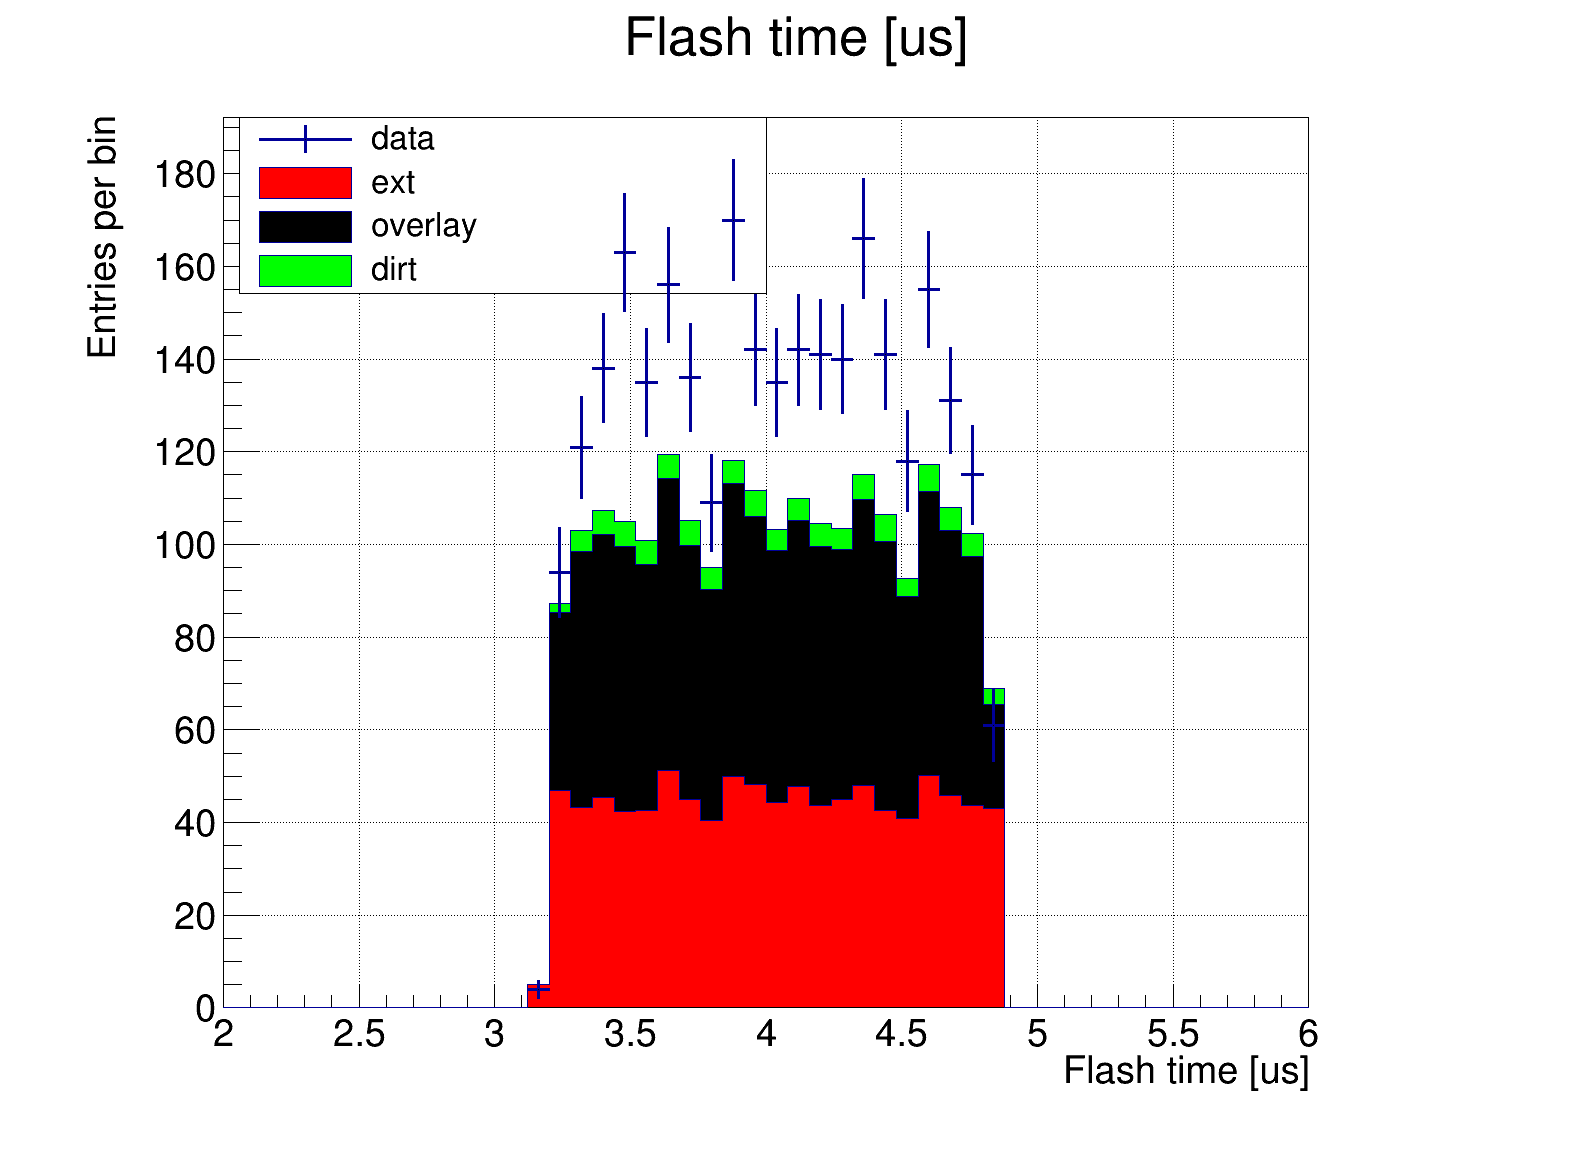

In [11]:
h_data = ROOT.TH1F("h_data","Flash time [us]",50,2,6)
h_ext = ROOT.TH1F("h_ext","Flash time [us]",50,2,6)
h_overlay = ROOT.TH1F("h_overlay","Flash time [us]",50,2,6)
h_dirt = ROOT.TH1F("h_dirt","Flash time [us]",50,2,6)

cut = 'fidVol'
#cut = '1'
#bnb= 3.195 - 4.875
# ext and overlay = 3.570 - 5.250
data.Draw('TimFla>>h_data',cut)
ext.Draw('TimFla-3.57+3.195>>h_ext',cut,'')
overlay.Draw('TimFla-3.57+3.195>>h_overlay',cut,'')
dirt.Draw('TimFla-3.57+3.195>>h_dirt',cut,'')

h_data.SetXTitle("Flash time [us]")
h_data.SetYTitle("Entries per bin")

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_data,"data","lep");
legend.AddEntry(h_ext,"ext","f");
legend.AddEntry(h_overlay,"overlay","f");
legend.AddEntry(h_dirt,"dirt","f");

print h_data.GetEntries()
hs = ROOT.THStack("hs","");
h_ext.SetFillColor(2);
h_overlay.SetFillColor(1);
h_dirt.SetFillColor(3);
h_data.SetLineWidth(3)
h_ext.Scale(scale_ext)
h_overlay.Scale(scale_overlay)
h_dirt.Scale(scale_dirt)
hs.Add(h_ext)
hs.Add(h_overlay)
hs.Add(h_dirt)
#h_temp.Draw()
h_data.Draw('E')
legend.Draw();
hs.Draw('same hist')
h_data.Draw('E same')
#h_overlay.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ "Flash.png")
c1.SaveAs(outputdir_root+ "Flash.root")

In [11]:
#Initial efficiency and purity
# signal = MC muon CC neutrino in fidVol
# signal_numu = MC muon CC neutrino + muon with purtity >50% in fidVol
overlay_fidVol = overlay.GetEntries("fidVol")
dirt_fidVol = dirt.GetEntries("fidVol")
ext_fidVol = ext.GetEntries("fidVol")

initial_pur_le = (overlay.GetEntries('numu_signal && fidVol')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
initial_eff_le = overlay.GetEntries("numu_signal && fidVol")/overlay.GetEntries("numu_signal && fidVol")

print 'Initial efficiency:                 {0:0.2f}%'.format( initial_eff_le*100)
print 'Initial purity:                     {0:0.2f}%'.format( initial_pur_le*100)
print ''
amount_ext = (ext.GetEntries('fidVol')*scale_ext)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of external:                 {0:0.2f}%'.format( amount_ext*100)
amount_dirt = (dirt.GetEntries('fidVol')*scale_dirt)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of dirt:                     {0:0.2f}%'.format( amount_dirt*100)
amount_overlay = (overlay.GetEntries('fidVol')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of overlay:                  {0:0.2f}%'.format( amount_overlay*100)
print ''
print 'Where overlay consists out of:'
overlay_numuCC =     (overlay.GetEntries("numu_signal && fidVol")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_nomu =     (overlay.GetEntries("signal && MCle_PDG!=13 && MCle_purity>0.5 && fidVol")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_lowpur =     (overlay.GetEntries("signal && MCle_purity<0.5 && fidVol")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuNC =     (overlay.GetEntries("MCfidVol && MCNu_CCNC==1 && fidVol")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_OutFidVol =  (overlay.GetEntries("!MCfidVol && fidVol")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_antiNumuCC = (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && fidVol")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_otherNu =    (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && fidVol")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Signal, numuCC:                     {0:0.2f}%'.format( overlay_numuCC*100)
print 'Signal, numuCC, no muon:            {0:0.2f}%'.format( overlay_numuCC_nomu*100)
print 'Signal, numuCC, low purity:         {0:0.2f}%'.format( overlay_numuCC_lowpur*100)
print 'Background, numuNC:                 {0:0.2f}%'.format( overlay_numuNC*100)
print 'Background, out of fiducial volume: {0:0.2f}%'.format( overlay_OutFidVol*100)
print 'Background, anti numu CC:           {0:0.2f}%'.format( overlay_antiNumuCC*100)
print 'Background, electron nu:            {0:0.2f}%'.format( overlay_otherNu*100)


Initial efficiency:                 100.00%
Initial purity:                     28.14%

Amount of external:                 43.60%
Amount of dirt:                     4.62%
Amount of overlay:                  51.78%

Where overlay consists out of:
Signal, numuCC:                     28.14%
Signal, numuCC, no muon:            3.63%
Signal, numuCC, low purity:         2.52%
Background, numuNC:                 7.08%
Background, out of fiducial volume: 9.93%
Background, anti numu CC:           0.24%
Background, electron nu:            0.23%


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_init_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_init_eff_energy.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_init_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_init_eff_theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_init_eff_phi.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_init_eff_phi.root has been created


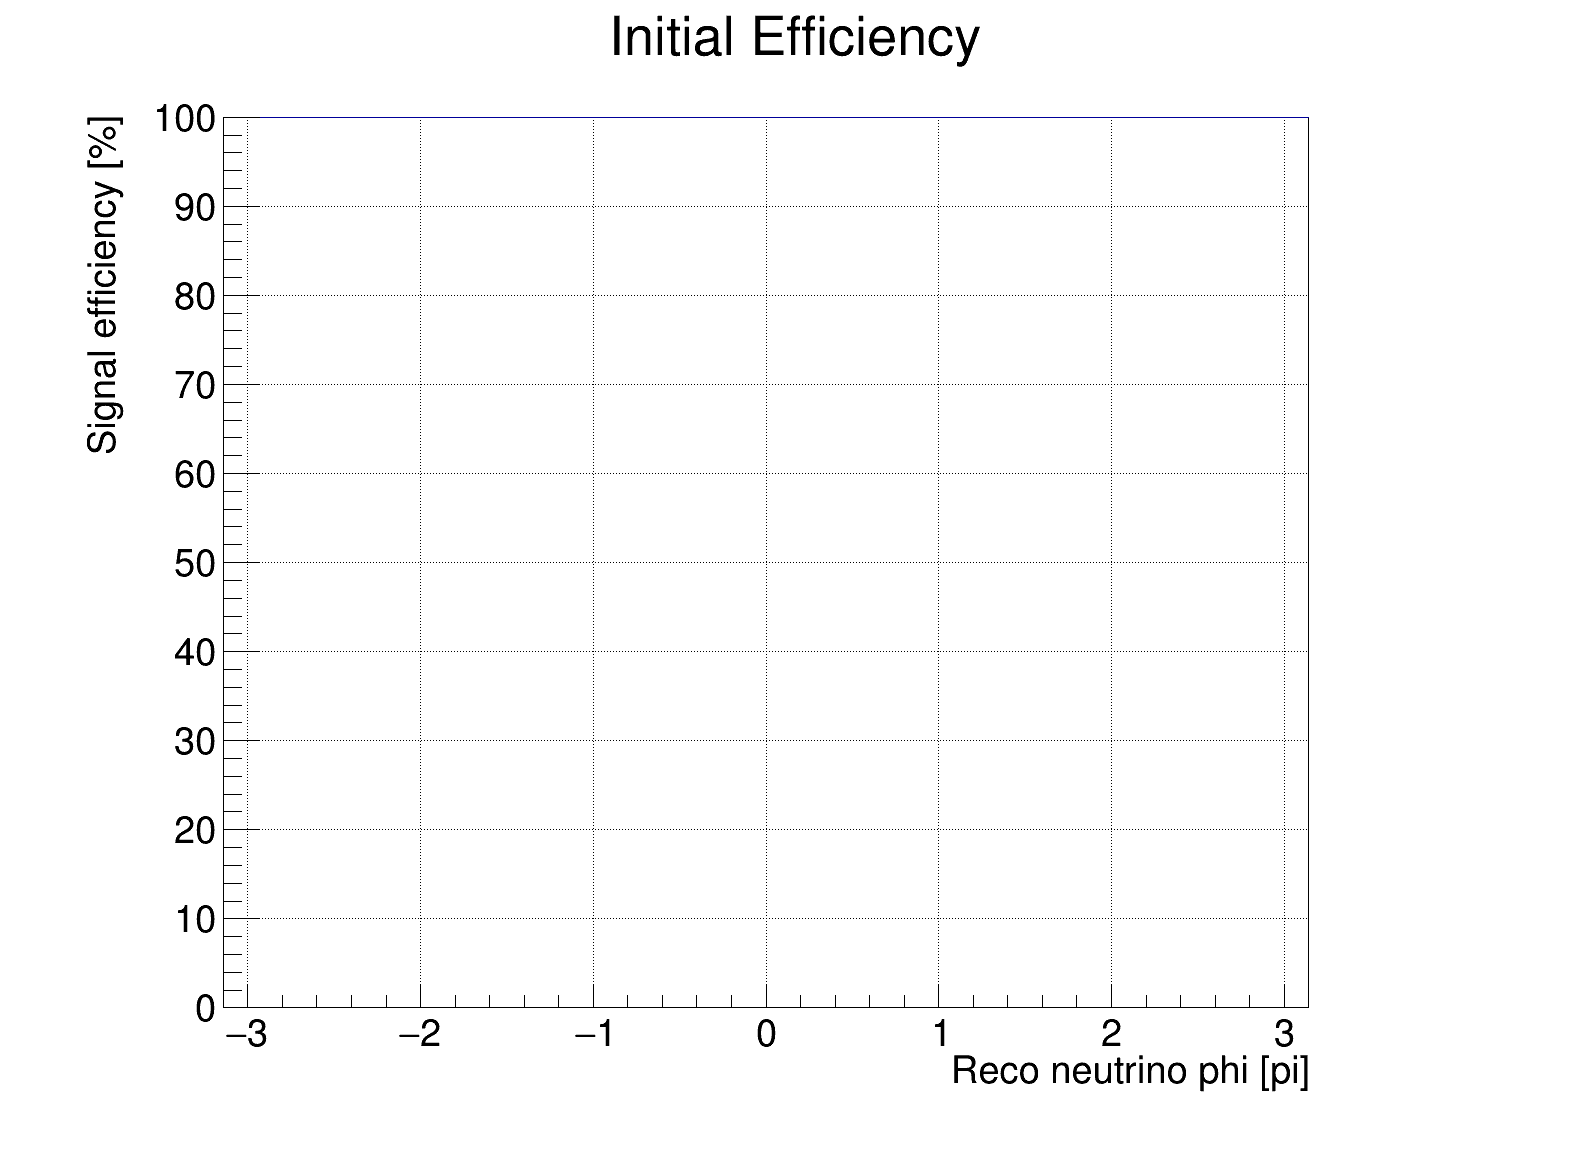

In [13]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && fidVol"
zahler_cut = "numu_signal && fidVol"

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy","Initial Efficiency",xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1","Initial Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',nenner_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',zahler_cut)
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth neutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("HIST")
c1.Draw()
c1.SaveAs(outputdir_png + "h_init_eff_energy.png")
c1.SaveAs(outputdir_root + "h_init_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta","Initial Efficiency",xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1","Initial Efficiency",xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',nenner_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',zahler_cut)
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("HIST")
c1.Draw()
c1.SaveAs(outputdir_png + "h_init_eff_theta.png")
c1.SaveAs(outputdir_root + "h_init_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi","Initial Efficiency",xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1","Initial Efficiency",xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',nenner_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',zahler_cut)
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("HIST")
c1.Draw()
c1.SaveAs(outputdir_png + "h_init_eff_phi.png")
c1.SaveAs(outputdir_root + "h_init_eff_phi.root")



In [12]:

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<1 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<1 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<1 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<1 || crtt0_time==-1)")

cosmic_rejection = ext.GetEntries("fidVol && crt_cut")/ext.GetEntries("fidVol")
dirt_rejection = dirt.GetEntries("fidVol && crt_cut")/dirt.GetEntries("fidVol")
overlay_rejection = overlay.GetEntries("fidVol && crt_cut")/overlay.GetEntries("fidVol")

print 'Cosmic keep:                        {0:0.2f}%'.format(cosmic_rejection*100),' reject: {0:0.2f}%'.format((1-cosmic_rejection)*100)
print 'Dirt keep:                          {0:0.2f}%'.format(dirt_rejection*100),' reject: {0:0.2f}%'.format((1-dirt_rejection)*100)
print 'Overlay keep:                       {0:0.2f}%'.format(overlay_rejection*100),' reject: {0:0.2f}%'.format((1-overlay_rejection)*100)
print ''

overlay_fidVol = overlay.GetEntries("fidVol && crt_cut")
dirt_fidVol = dirt.GetEntries("fidVol && crt_cut")
ext_fidVol = ext.GetEntries("fidVol && crt_cut")

initial_pur_le = (overlay.GetEntries('numu_signal && fidVol && crt_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
initial_eff_le = overlay.GetEntries("numu_signal && fidVol && crt_cut")/overlay.GetEntries("numu_signal && fidVol")

print 'total efficiency:                   {0:0.2f}%'.format( initial_eff_le*100)
print 'total purity:                       {0:0.2f}%'.format( initial_pur_le*100)
print ''
amount_ext = (ext.GetEntries('fidVol && crt_cut')*scale_ext)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of external:                 {0:0.2f}%'.format( amount_ext*100)
amount_dirt = (dirt.GetEntries('fidVol && crt_cut')*scale_dirt)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of dirt:                     {0:0.2f}%'.format( amount_dirt*100)
amount_overlay = (overlay.GetEntries('fidVol && crt_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of overlay:                  {0:0.2f}%'.format( amount_overlay*100)
print ''
print 'Where overlay consists out of:'
overlay_numuCC =     (overlay.GetEntries("numu_signal && fidVol && crt_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_nomu =     (overlay.GetEntries("signal && MCle_PDG!=13 && MCle_purity>0.5 && fidVol && crt_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_lowpur =     (overlay.GetEntries("signal && MCle_purity<0.5 && fidVol && crt_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuNC =     (overlay.GetEntries("MCfidVol && MCNu_CCNC==1 && fidVol")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_OutFidVol =  (overlay.GetEntries("!MCfidVol && fidVol && crt_cut")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_antiNumuCC = (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && fidVol && crt_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_otherNu =    (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && fidVol && crt_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Signal, numuCC:                     {0:0.2f}%'.format( overlay_numuCC*100)
print 'Signal, numuCC, no muon:            {0:0.2f}%'.format( overlay_numuCC_nomu*100)
print 'Signal, numuCC, low purity:         {0:0.2f}%'.format( overlay_numuCC_lowpur*100)
print 'Background, numuNC:                 {0:0.2f}%'.format( overlay_numuNC*100)
print 'Background, out of fiducial volume: {0:0.2f}%'.format( overlay_OutFidVol*100)
print 'Background, anti numu CC:           {0:0.2f}%'.format( overlay_antiNumuCC*100)
print 'Background, electron nu:            {0:0.2f}%'.format( overlay_otherNu*100)




Cosmic keep:                        79.46%  reject: 20.54%
Dirt keep:                          84.21%  reject: 15.79%
Overlay keep:                       90.23%  reject: 9.77%

total efficiency:                   93.19%
total purity:                       30.76%

Amount of external:                 40.63%
Amount of dirt:                     4.57%
Amount of overlay:                  54.80%

Where overlay consists out of:
Signal, numuCC:                     30.76%
Signal, numuCC, no muon:            3.94%
Signal, numuCC, low purity:         2.14%
Background, numuNC:                 8.30%
Background, out of fiducial volume: 9.75%
Background, anti numu CC:           0.26%
Background, electron nu:            0.26%


Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_crt_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_crt_eff_energy.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_crt_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_crt_eff_theta.root has been created
Warning in <TROOT::Append>: Replacing ex

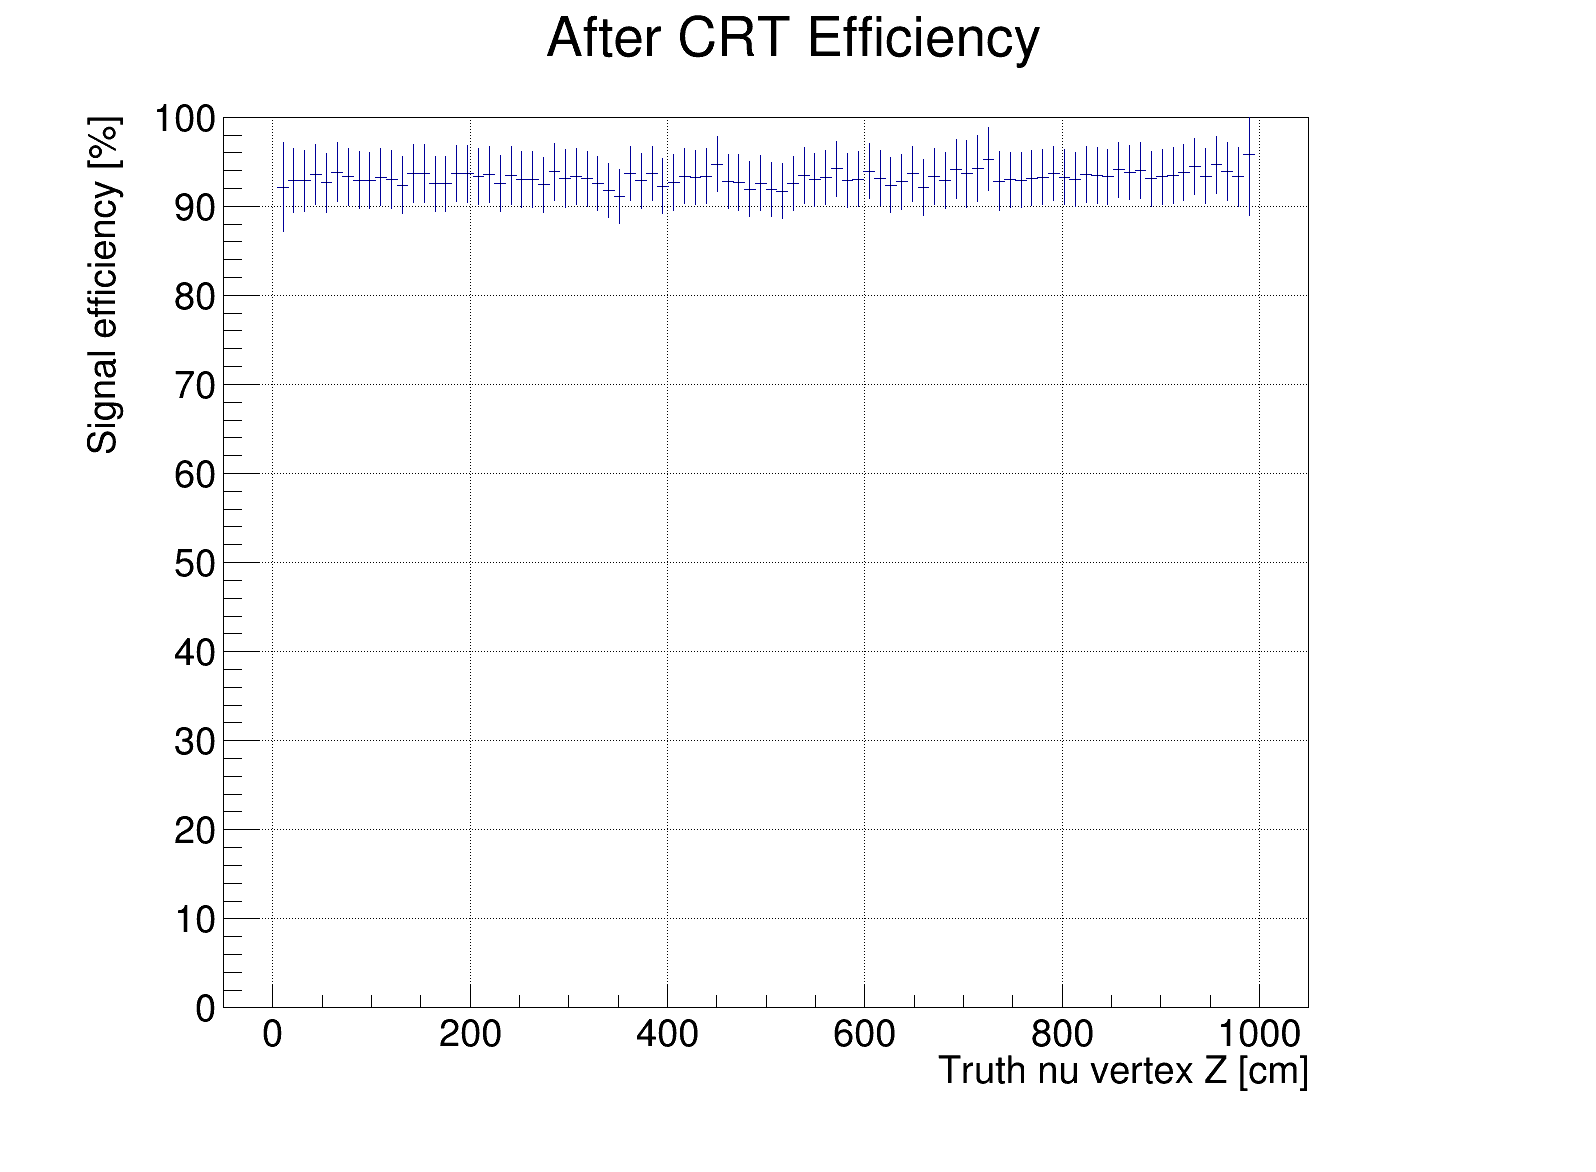

In [15]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && fidVol"
zahler_cut = "numu_signal && fidVol && crt_cut"

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth enutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_energy.png")
c1.SaveAs(outputdir_root + "h_crt_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_theta.png")
c1.SaveAs(outputdir_root + "h_crt_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_phi.png")
c1.SaveAs(outputdir_root + "h_crt_eff_phi.root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_Vx.png")
c1.SaveAs(outputdir_root + "h_crt_eff_Vx.root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_Vy.png")
c1.SaveAs(outputdir_root + "h_crt_eff_Vy.root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After CRT Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After CRT Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_crt_eff_Vz.png")
c1.SaveAs(outputdir_root + "h_crt_eff_Vz.root")



Variation of cut on: TrackLength
Maximum value:  0.335513532162
Bin:  59  -> Value:  29.0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/TrackLength.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/TrackLength.root has been created


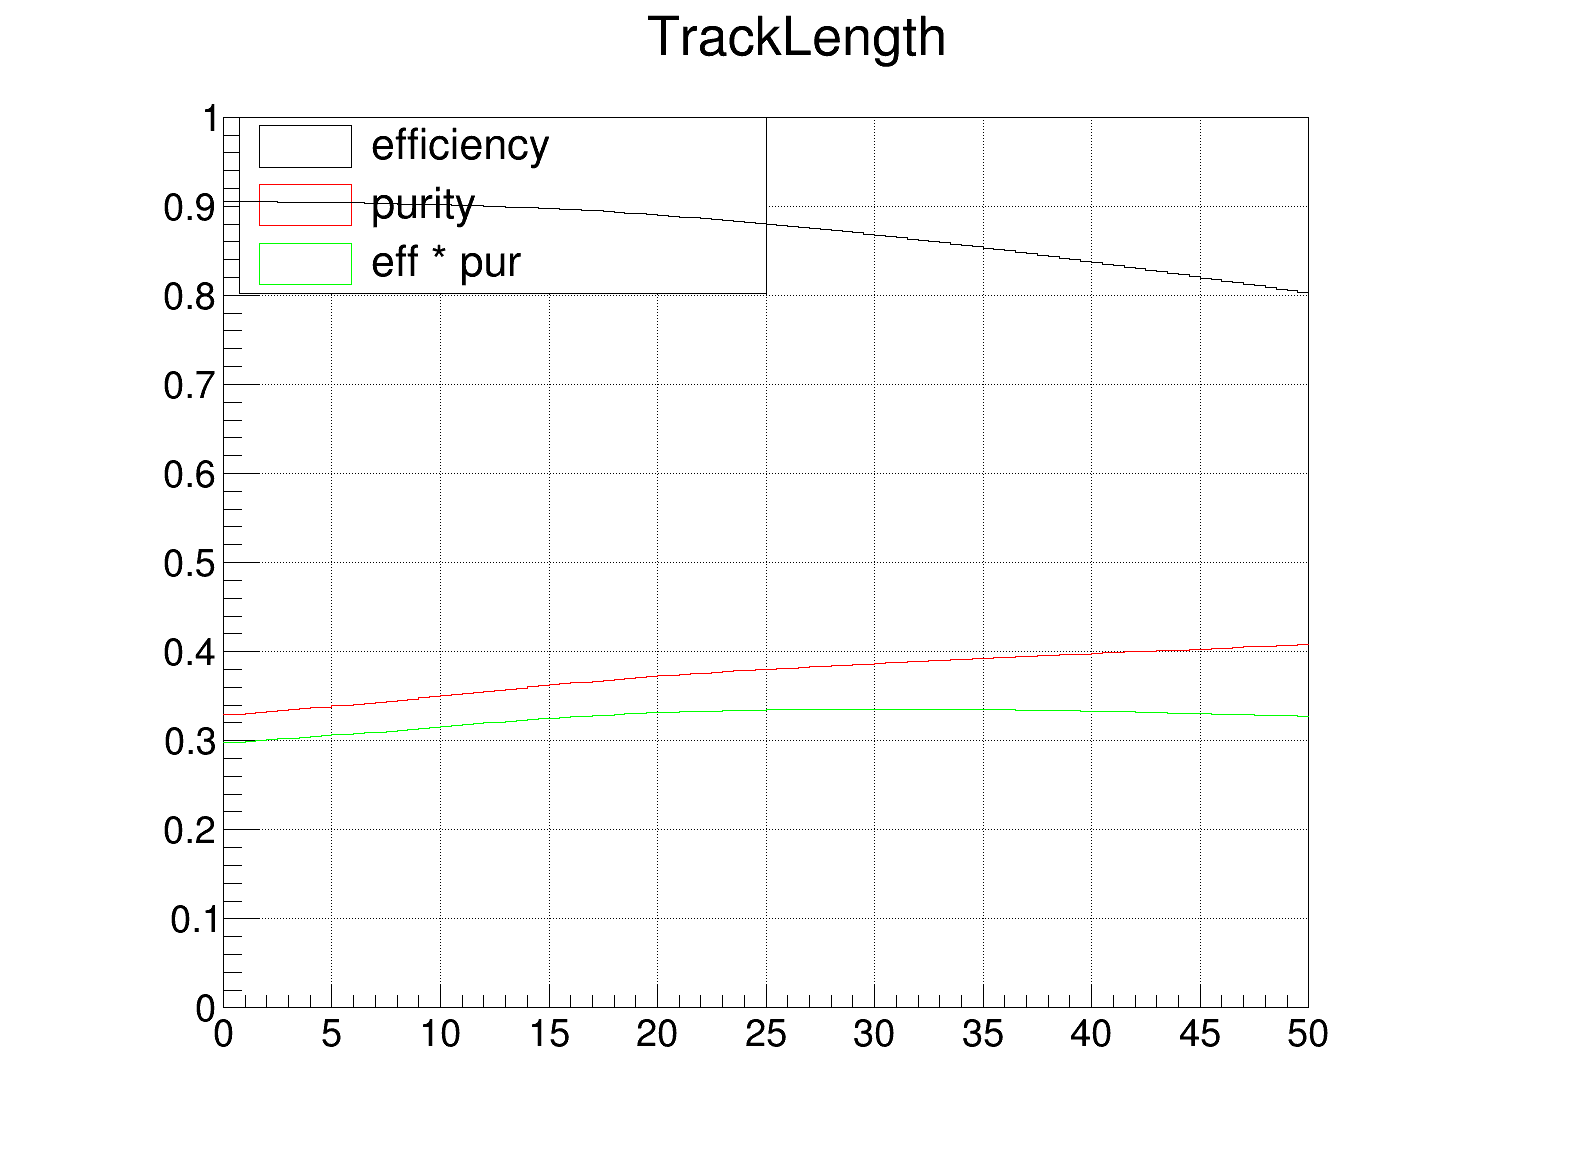

In [16]:
value = 'TrackLength'
xbins = 100
step = 50.0/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'crt_cut && fidVol && '+value+'>'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [13]:

data.SetAlias("tracklength_cut","TrackLength>29")
ext.SetAlias("tracklength_cut","TrackLength>29")
overlay.SetAlias("tracklength_cut","TrackLength>29")
dirt.SetAlias("tracklength_cut","TrackLength>29")

cosmic_rejection = ext.GetEntries("fidVol && crt_cut && tracklength_cut")/ext.GetEntries("fidVol && crt_cut")
dirt_rejection = dirt.GetEntries("fidVol && crt_cut && tracklength_cut")/dirt.GetEntries("fidVol && crt_cut")
overlay_rejection = overlay.GetEntries("fidVol && crt_cut && tracklength_cut")/overlay.GetEntries("fidVol && crt_cut")
'Only this cut:'
print 'Cosmic keep:                        {0:0.2f}%'.format(cosmic_rejection*100),' reject: {0:0.2f}%'.format((1-cosmic_rejection)*100)
print 'Dirt keep:                          {0:0.2f}%'.format(dirt_rejection*100),' reject: {0:0.2f}%'.format((1-dirt_rejection)*100)
print 'Overlay keep:                       {0:0.2f}%'.format(overlay_rejection*100),' reject: {0:0.2f}%'.format((1-overlay_rejection)*100)
print ''

cosmic_rejection = ext.GetEntries("fidVol && crt_cut && tracklength_cut")/ext.GetEntries("fidVol")
dirt_rejection = dirt.GetEntries("fidVol && crt_cut && tracklength_cut")/dirt.GetEntries("fidVol")
overlay_rejection = overlay.GetEntries("fidVol && crt_cut && tracklength_cut")/overlay.GetEntries("fidVol")
'Including all cuts:'
print 'Cosmic keep:                        {0:0.2f}%'.format(cosmic_rejection*100),' reject: {0:0.2f}%'.format((1-cosmic_rejection)*100)
print 'Dirt keep:                          {0:0.2f}%'.format(dirt_rejection*100),' reject: {0:0.2f}%'.format((1-dirt_rejection)*100)
print 'Overlay keep:                       {0:0.2f}%'.format(overlay_rejection*100),' reject: {0:0.2f}%'.format((1-overlay_rejection)*100)
print ''

overlay_fidVol = overlay.GetEntries("fidVol && crt_cut && tracklength_cut")
dirt_fidVol = dirt.GetEntries("fidVol && crt_cut && tracklength_cut")
ext_fidVol = ext.GetEntries("fidVol && crt_cut && tracklength_cut")

initial_pur_le = (overlay.GetEntries('numu_signal && fidVol && crt_cut && tracklength_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
initial_eff_le = overlay.GetEntries("numu_signal && fidVol && crt_cut && tracklength_cut")/overlay.GetEntries("numu_signal && fidVol")

print 'Total efficiency:                   {0:0.2f}%'.format( initial_eff_le*100)
print 'Total purity:                       {0:0.2f}%'.format( initial_pur_le*100)
print ''
amount_ext = (ext.GetEntries('fidVol && crt_cut && tracklength_cut')*scale_ext)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of external:                 {0:0.2f}%'.format( amount_ext*100)
amount_dirt = (dirt.GetEntries('fidVol && crt_cut && tracklength_cut')*scale_dirt)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of dirt:                     {0:0.2f}%'.format( amount_dirt*100)
amount_overlay = (overlay.GetEntries('fidVol && crt_cut && tracklength_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of overlay:                  {0:0.2f}%'.format( amount_overlay*100)
print ''
print 'Where overlay consists out of:'
overlay_numuCC =     (overlay.GetEntries("numu_signal && fidVol && crt_cut && tracklength_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_nomu =     (overlay.GetEntries("signal && MCle_PDG!=13 && MCle_purity>0.5 && fidVol && crt_cut && tracklength_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_lowpur =     (overlay.GetEntries("signal && MCle_purity<0.5 && fidVol && crt_cut && tracklength_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuNC =     (overlay.GetEntries("MCfidVol && MCNu_CCNC==1 && fidVol && tracklength_cut")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_OutFidVol =  (overlay.GetEntries("!MCfidVol && fidVol && crt_cut && tracklength_cut")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_antiNumuCC = (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && fidVol && crt_cut && tracklength_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_otherNu =    (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && fidVol && crt_cut && tracklength_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Signal, numuCC:                     {0:0.2f}%'.format( overlay_numuCC*100)
print 'Signal, numuCC, no muon:            {0:0.2f}%'.format( overlay_numuCC_nomu*100)
print 'Signal, numuCC, low purity:         {0:0.2f}%'.format( overlay_numuCC_lowpur*100)
print 'Background, numuNC:                 {0:0.2f}%'.format( overlay_numuNC*100)
print 'Background, out of fiducial volume: {0:0.2f}%'.format( overlay_OutFidVol*100)
print 'Background, anti numu CC:           {0:0.2f}%'.format( overlay_antiNumuCC*100)
print 'Background, electron nu:            {0:0.2f}%'.format( overlay_otherNu*100)




Cosmic keep:                        75.33%  reject: 24.67%
Dirt keep:                          63.98%  reject: 36.02%
Overlay keep:                       78.80%  reject: 21.20%

Cosmic keep:                        59.86%  reject: 40.14%
Dirt keep:                          53.88%  reject: 46.12%
Overlay keep:                       71.10%  reject: 28.90%

Total efficiency:                   89.60%
Total purity:                       38.56%

Amount of external:                 39.90%
Amount of dirt:                     3.81%
Amount of overlay:                  56.29%

Where overlay consists out of:
Signal, numuCC:                     38.56%
Signal, numuCC, no muon:            3.97%
Signal, numuCC, low purity:         1.49%
Background, numuNC:                 4.44%
Background, out of fiducial volume: 8.06%
Background, anti numu CC:           0.32%
Background, electron nu:            0.12%


Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_tracklength_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_tracklength_eff_energy.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_tracklength_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_tracklength_eff_theta.root has been created
Warning 

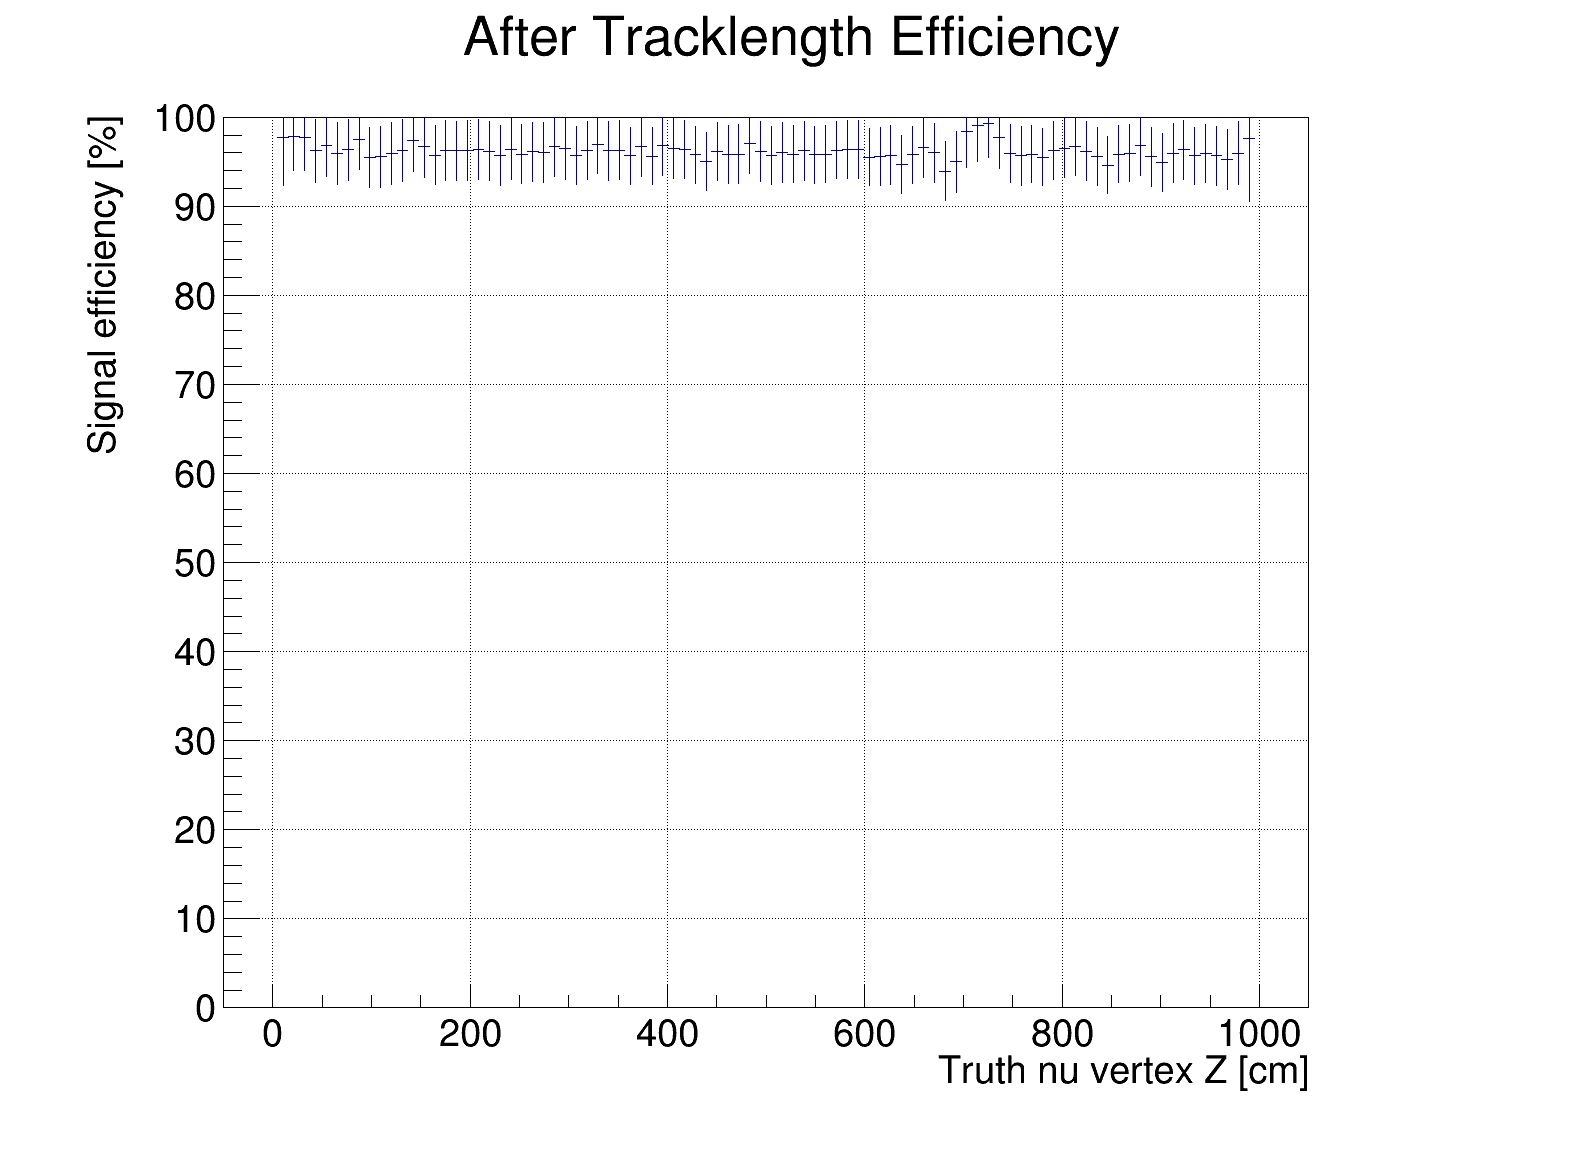

In [24]:
xstart = 0
xend = 5
xbin = 100

nenner_cut = "numu_signal && fidVol && crt_cut"
zahler_cut = "numu_signal && fidVol && crt_cut && tracklength_cut"

histo_title = 'After Tracklength Efficiency'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",histo_title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth enutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_energy.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta",histo_title,xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1",histo_title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_theta.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi",histo_title,xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1",histo_title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_phi.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_phi.root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_Vx.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_Vx.root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_Vy.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_Vy.root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_eff_Vz.png")
c1.SaveAs(outputdir_root + "h_tracklength_eff_Vz.root")



Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_tracklength_crt_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_tracklength_crt_eff_energy.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_tracklength_crt_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_tracklength_crt_eff_theta.root has been 

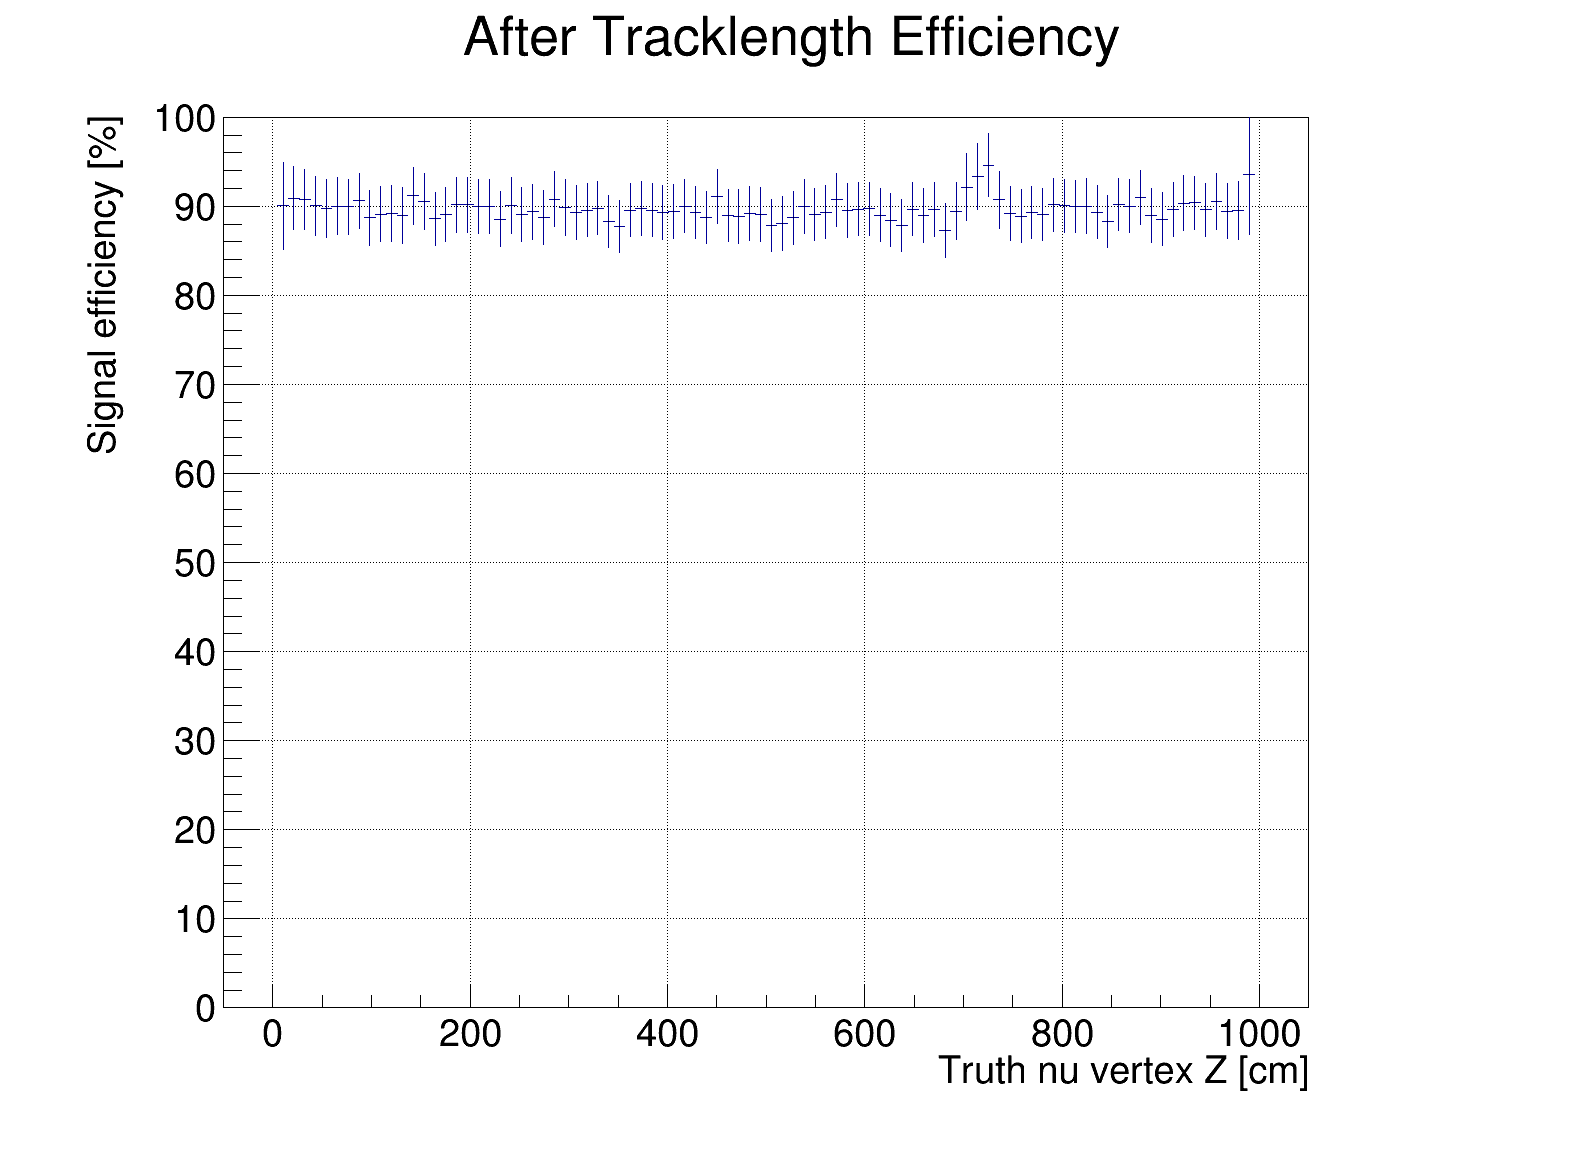

In [25]:
xstart = 0
xend = 5
xbin = 100

nenner_cut = "numu_signal && fidVol"
zahler_cut = "numu_signal && fidVol && crt_cut && tracklength_cut"

histo_title = 'After Tracklength Efficiency'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",histo_title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth enutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_energy.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta",histo_title,xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1",histo_title,xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_theta.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi",histo_title,xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1",histo_title,xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_phi.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_phi.root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_Vx.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_Vx.root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_Vy.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_Vy.root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V",histo_title,xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1",histo_title,xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_tracklength_crt_eff_Vz.png")
c1.SaveAs(outputdir_root + "h_tracklength_crt_eff_Vz.root")



Variation of cut on: NuScore
Maximum value:  48.611328125
Bin:  21  -> Value:  0.2


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/NuScore.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/NuScore.root has been created


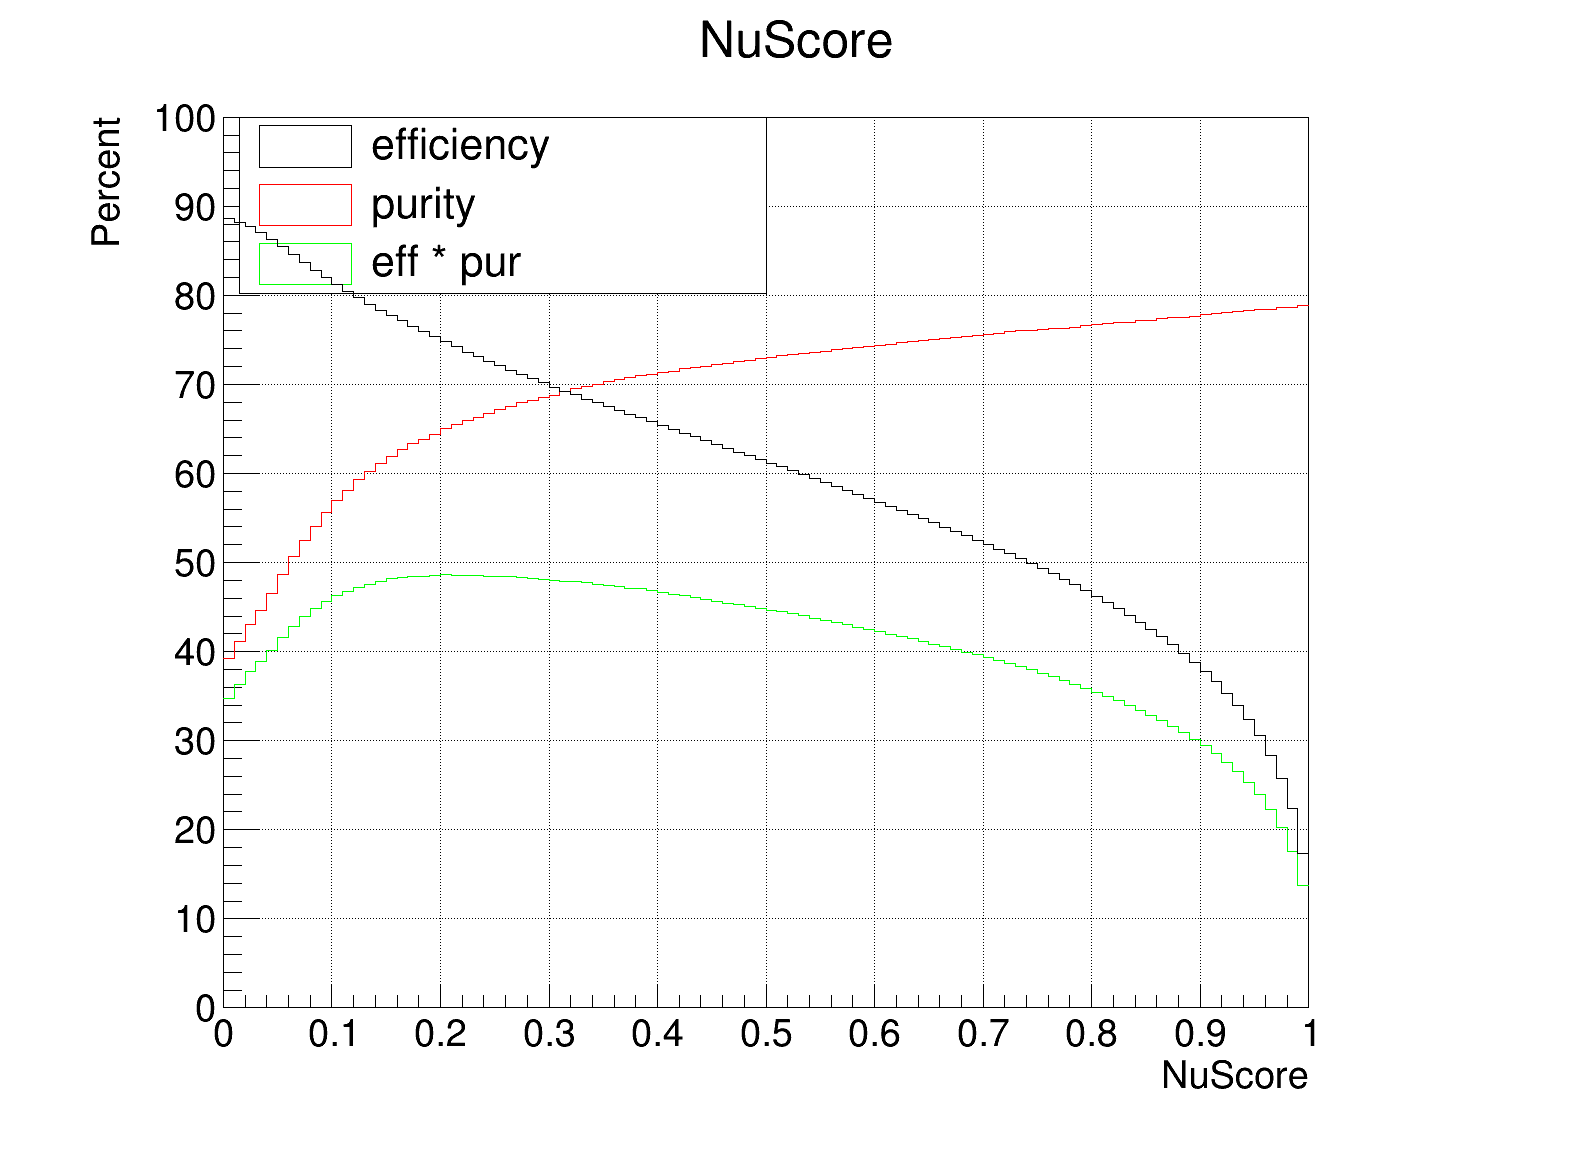

In [14]:
value = 'NuScore'
xbins = 100
step = 1.0/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,1)

for i in range(xbins):
    cut = 'tracklength_cut && crt_cut && fidVol && '+value+'>'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal && fidVol ")
    h_eff.SetBinContent(i+1,eff*100)
    h_pur.SetBinContent(i+1,pur*100)
    h_effpur.SetBinContent(i+1,eff*pur*100)
    '''
    print cut
    print 'Initial efficiency: {0:0.2f}%'.format( eff*100)
    print 'Initial purity: {0:0.2f}%'.format( pur*100)
    print 'Initial purity x efficiency: {0:0.2f}%'.format( pur*eff*100)
    print ''
    '''
legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetXTitle(value)
h_eff.SetYTitle("Percent")
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_eff.SetLineColor(1)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [15]:
cut_name = 'NuScore_cut'
cut_value = 'NuScore>0.2'
data.SetAlias(cut_name,cut_value)
ext.SetAlias(cut_name,cut_value)
overlay.SetAlias(cut_name,cut_value)
dirt.SetAlias(cut_name,cut_value)

cosmic_rejection = ext.GetEntries("fidVol && crt_cut && tracklength_cut && NuScore_cut")/ext.GetEntries("fidVol && crt_cut && tracklength_cut")
dirt_rejection = dirt.GetEntries("fidVol && crt_cut && tracklength_cut && NuScore_cut")/dirt.GetEntries("fidVol && crt_cut && tracklength_cut")
overlay_rejection = overlay.GetEntries("fidVol && crt_cut && tracklength_cut && NuScore_cut")/overlay.GetEntries("fidVol && crt_cut && tracklength_cut")

print 'Cosmic keep:                        {0:0.2f}%'.format(cosmic_rejection*100),' reject: {0:0.2f}%'.format((1-cosmic_rejection)*100)
print 'Dirt keep:                          {0:0.2f}%'.format(dirt_rejection*100),' reject: {0:0.2f}%'.format((1-dirt_rejection)*100)
print 'Overlay keep:                       {0:0.2f}%'.format(overlay_rejection*100),' reject: {0:0.2f}%'.format((1-overlay_rejection)*100)
print ''

overlay_fidVol = overlay.GetEntries("fidVol && crt_cut && NuScore_cut")
dirt_fidVol = dirt.GetEntries("fidVol && crt_cut && NuScore_cut")
ext_fidVol = ext.GetEntries("fidVol && crt_cut && NuScore_cut")

initial_pur_le = (overlay.GetEntries('numu_signal && fidVol && crt_cut && tracklength_cut && NuScore_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
initial_eff_le = overlay.GetEntries("numu_signal && fidVol && crt_cut && tracklength_cut && NuScore_cut")/overlay.GetEntries("numu_signal && fidVol && crt_cut")

print 'Total efficiency:                   {0:0.2f}%'.format( initial_eff_le*100)
print 'Total purity:                       {0:0.2f}%'.format( initial_pur_le*100)
print ''
amount_ext = (ext.GetEntries('fidVol && crt_cut && NuScore_cut')*scale_ext)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of external:                 {0:0.2f}%'.format( amount_ext*100)
amount_dirt = (dirt.GetEntries('fidVol && crt_cut && NuScore_cut')*scale_dirt)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of dirt:                     {0:0.2f}%'.format( amount_dirt*100)
amount_overlay = (overlay.GetEntries('fidVol && crt_cut && NuScore_cut')*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Amount of overlay:                  {0:0.2f}%'.format( amount_overlay*100)
print ''
print 'Where overlay consists out of:'
overlay_numuCC =     (overlay.GetEntries("numu_signal && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_nomu =     (overlay.GetEntries("signal && MCle_PDG!=13 && MCle_purity>0.5 && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuCC_lowpur =     (overlay.GetEntries("signal && MCle_purity<0.5 && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_numuNC =     (overlay.GetEntries("MCfidVol && MCNu_CCNC==1 && fidVol && tracklength_cut && NuScore_cut")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_OutFidVol =  (overlay.GetEntries("!MCfidVol && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/(overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_antiNumuCC = (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
overlay_otherNu =    (overlay.GetEntries("MCfidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && fidVol && crt_cut && tracklength_cut && NuScore_cut")*scale_overlay)/ (overlay_fidVol*scale_overlay + ext_fidVol*scale_ext + dirt_fidVol*scale_dirt)
print 'Signal, numuCC:                     {0:0.2f}%'.format( overlay_numuCC*100)
print 'Signal, numuCC, no muon:            {0:0.2f}%'.format( overlay_numuCC_nomu*100)
print 'Signal, numuCC, low purity:         {0:0.2f}%'.format( overlay_numuCC_lowpur*100)
print 'Background, numuNC:                 {0:0.2f}%'.format( overlay_numuNC*100)
print 'Background, out of fiducial volume: {0:0.2f}%'.format( overlay_OutFidVol*100)
print 'Background, anti numu CC:           {0:0.2f}%'.format( overlay_antiNumuCC*100)
print 'Background, electron nu:            {0:0.2f}%'.format( overlay_otherNu*100)




Cosmic keep:                        14.87%  reject: 85.13%
Dirt keep:                          33.85%  reject: 66.15%
Overlay keep:                       75.13%  reject: 24.87%

Total efficiency:                   80.26%
Total purity:                       52.41%

Amount of external:                 14.06%
Amount of dirt:                     3.03%
Amount of overlay:                  82.91%

Where overlay consists out of:
Signal, numuCC:                     52.41%
Signal, numuCC, no muon:            5.86%
Signal, numuCC, low purity:         0.92%
Background, numuNC:                 4.61%
Background, out of fiducial volume: 4.90%
Background, anti numu CC:           0.43%
Background, electron nu:            0.17%


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_nuscore_eff_energy.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_nuscore_eff_theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore_eff_phi.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_nuscore_eff_phi.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore

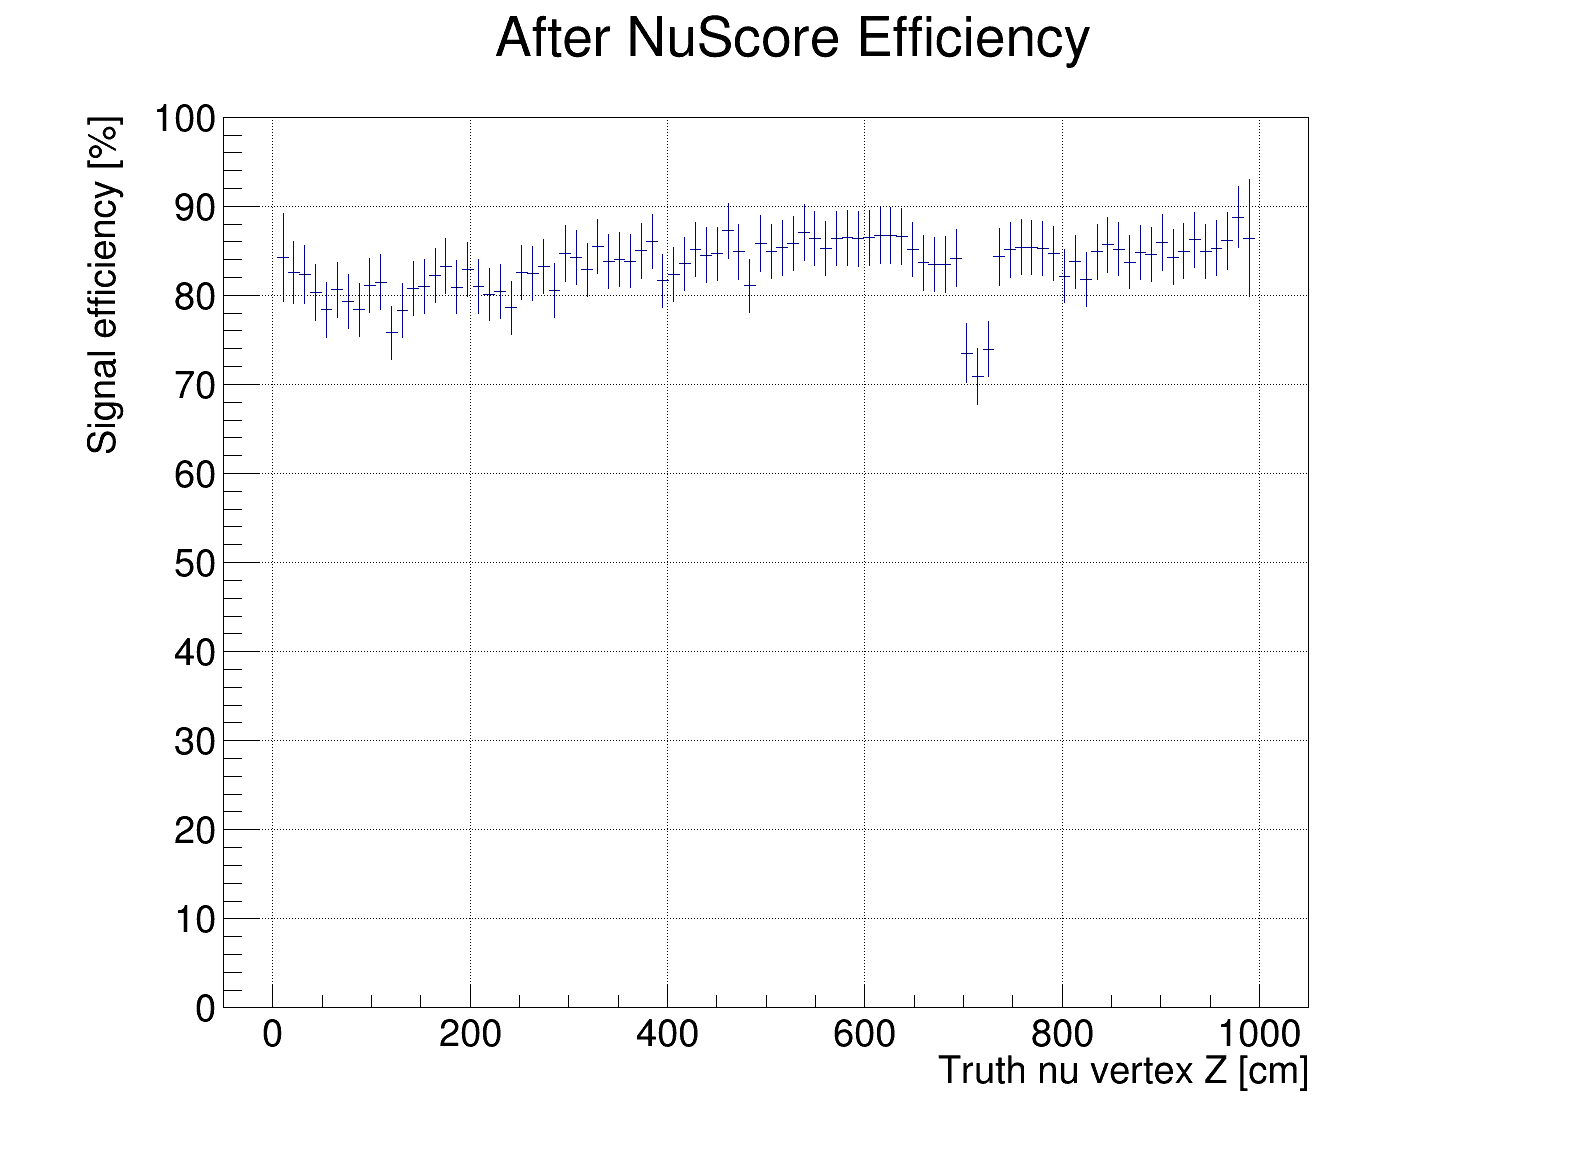

In [16]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && fidVol && crt_cut && tracklength_cut"
zahler_cut = "numu_signal && fidVol && crt_cut && tracklength_cut && NuScore_cut"

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth enutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_energy.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_theta.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_phi.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_phi.root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_Vx.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_Vx.root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_Vy.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_Vy.root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_eff_Vz.png")
c1.SaveAs(outputdir_root + "h_nuscore_eff_Vz.root")



Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore_track_crt_eff_energy.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_nuscore_track_crt_eff_energy.root has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_theta_1 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/png/h_nuscore_track_crt_eff_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_17/NumuCC_cut_dev/root/h_nuscore_track_crt_eff_theta.root h

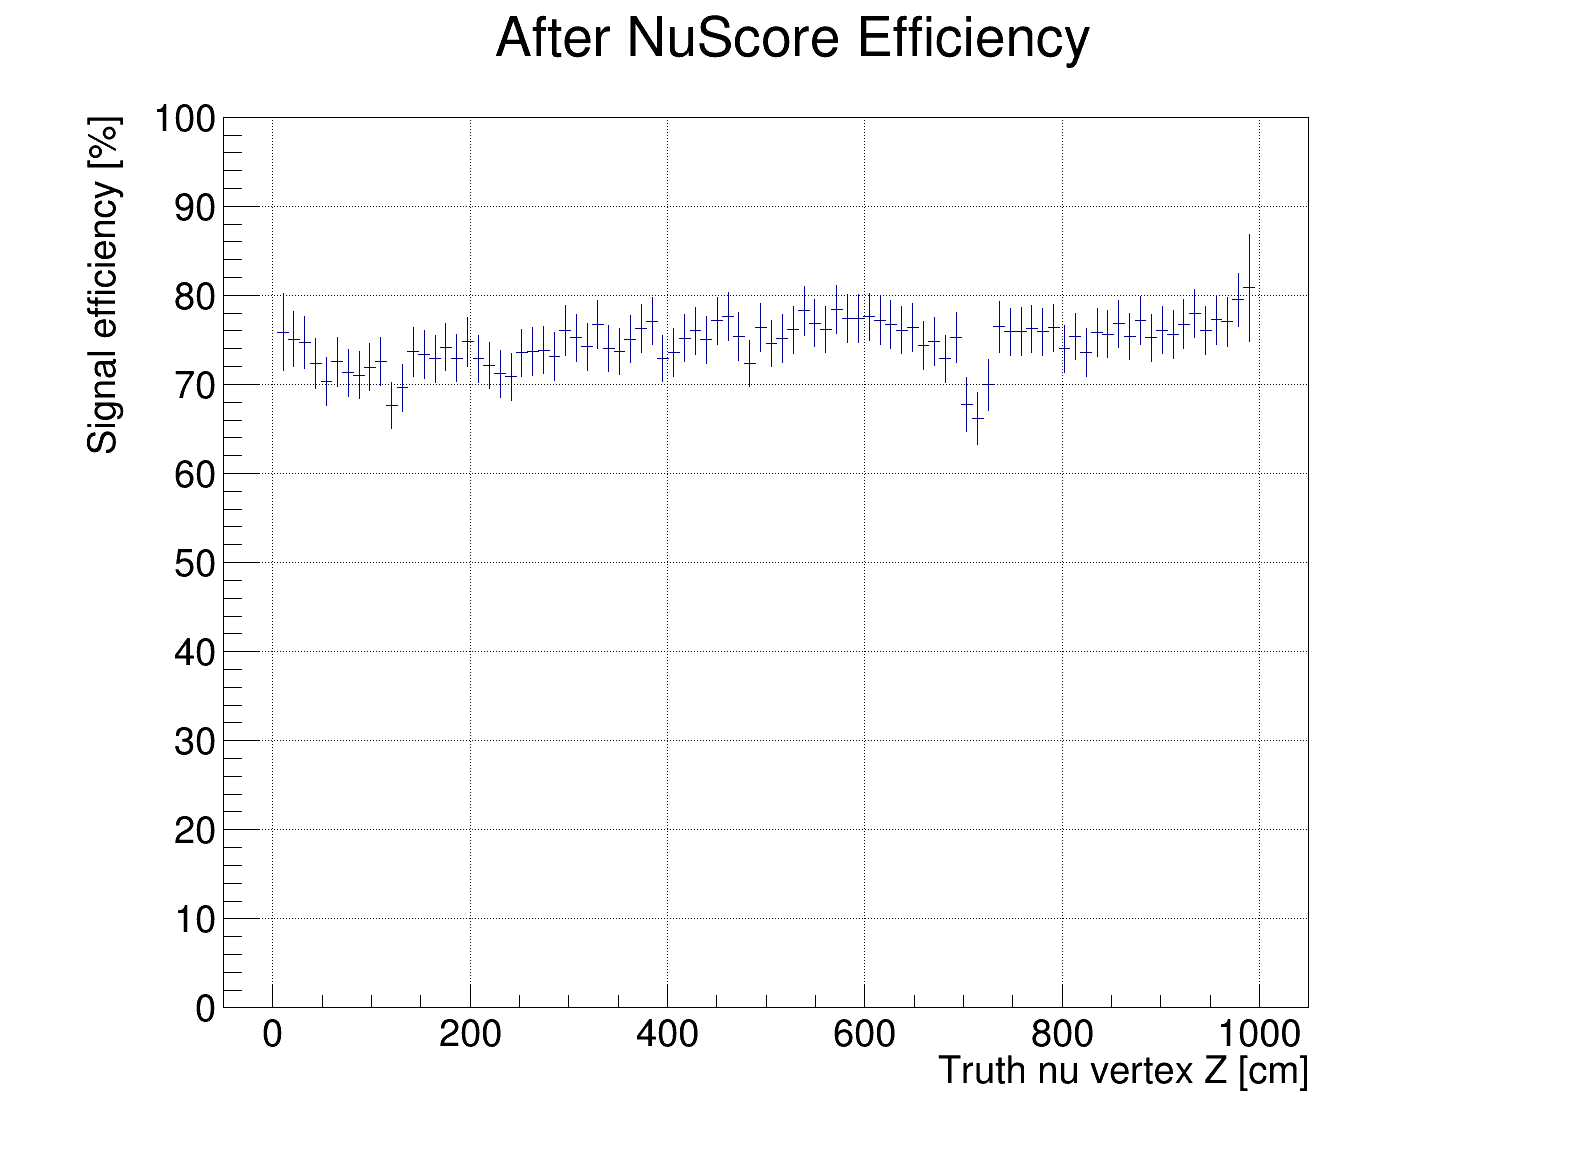

In [17]:
xstart = 0
xend = 8
xbin = 100

nenner_cut = "numu_signal && fidVol"
zahler_cut = "numu_signal && fidVol && crt_cut && tracklength_cut && NuScore_cut"

h_init_eff_energy = ROOT.TH1F("h_init_eff_energy","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Energy>>h_init_eff_energy',zahler_cut)
overlay.Draw('MCNu_Energy>>h_init_eff_energy_1',nenner_cut)
h_init_eff_energy_1.Sumw2()
h_init_eff_energy.Divide(h_init_eff_energy_1)
h_init_eff_energy.Scale(100)
h_init_eff_energy.SetMaximum(100)
h_init_eff_energy.SetMinimum(0)
h_init_eff_energy.SetXTitle("Truth enutrino energy [GeV]")
h_init_eff_energy.SetYTitle("Signal efficiency [%]")
h_init_eff_energy.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_energy.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_energy.root")

xstart = -1
xend = 1
xbin = 100
h_init_eff_theta = ROOT.TH1F("h_init_eff_theta","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_theta_1 = ROOT.TH1F("h_init_eff_theta_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta',zahler_cut)
overlay.Draw('cos(MCNu_leptonTheta)>>h_init_eff_theta_1',nenner_cut)
h_init_eff_theta_1.Sumw2()
h_init_eff_theta.Divide(h_init_eff_theta_1)
h_init_eff_theta.Scale(100)
h_init_eff_theta.SetMaximum(100)
h_init_eff_theta.SetMinimum(0)
h_init_eff_theta.SetXTitle("Truth neutrino cos(theta)")
h_init_eff_theta.SetYTitle("Signal efficiency [%]")
h_init_eff_theta.Draw("E")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_theta.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_theta.root")

xstart = -3.14159
xend = 3.14159
xbin = 100
h_init_eff_phi = ROOT.TH1F("h_init_eff_phi","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_phi_1 = ROOT.TH1F("h_init_eff_phi_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('TrackPhi>>h_init_eff_phi',zahler_cut)
overlay.Draw('TrackPhi>>h_init_eff_phi_1',nenner_cut)
h_init_eff_phi_1.Sumw2()
h_init_eff_phi.Divide(h_init_eff_phi_1)
h_init_eff_phi.Scale(100)
h_init_eff_phi.SetMaximum(100)
h_init_eff_phi.SetMinimum(0)
h_init_eff_phi.SetXTitle("Reco neutrino phi [pi]")
h_init_eff_phi.SetYTitle("Signal efficiency [%]")
h_init_eff_phi.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_phi.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_phi.root")

xstart = -50
xend = 300
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vx>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vx>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex X [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_Vx.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_Vx.root")

xstart = -150
xend = 150
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vy>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vy>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Y [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_Vy.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_Vy.root")

xstart = -50
xend = 1050
xbin = 100
h_init_eff_V = ROOT.TH1F("h_init_eff_V","After NuScore Efficiency",xbin,xstart,xend)
h_init_eff_V_1 = ROOT.TH1F("h_init_eff_V_1","After NuScore Efficiency",xbin,xstart,xend)
overlay.Draw('MCNu_Vz>>h_init_eff_V',zahler_cut)
overlay.Draw('MCNu_Vz>>h_init_eff_V_1',nenner_cut)
h_init_eff_V_1.Sumw2()
h_init_eff_V.Divide(h_init_eff_V_1)
h_init_eff_V.Scale(100)
h_init_eff_V.SetMaximum(100)
h_init_eff_V.SetMinimum(0)
h_init_eff_V.SetXTitle("Truth nu vertex Z [cm]")
h_init_eff_V.SetYTitle("Signal efficiency [%]")
h_init_eff_V.Draw("e")
c1.Draw()
c1.SaveAs(outputdir_png + "h_nuscore_track_crt_eff_Vz.png")
c1.SaveAs(outputdir_root + "h_nuscore_track_crt_eff_Vz.root")


In [ ]:
value = 'TrackPID_chimuon/TrackPID_chiproton'
xbins = 100
step = 0.4/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'fidVol && '+value+'<'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_eff.SetLineColor(1)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ 'TrackPID_chiproton' +".png");
c1.SaveAs(outputdir_root+ 'TrackPID_chiproton'+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [ ]:
value = 'TrackPID_chimuon/TrackPID_chipion'
xbins = 100
step = 1.5/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'fidVol && '+value+'<'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_eff.SetLineColor(1)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ 'TrackPID_chipion' +".png");
c1.SaveAs(outputdir_root+ 'TrackPID_chipion'+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [ ]:
value = 'TrackLength'
xbins = 100
step = 50.0/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'NuScore>0.27 && fidVol && '+value+'>'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [ ]:
value = 'VtxDistance'
xbins = 100
step = 25.0/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'crt_cut && tracklength_cut && fidVol && '+value+'<'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_eff.SetLineColor(1)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step

In [ ]:
cut = 'VtxDistance<5 && NuScore>0.8 && FlashScore<50 && TrackPID_chimuon/TrackPID_chiproton<0.2 && TrackPID_chimuon/TrackPID_chipion<1'

In [ ]:
value = 'FlashScore'
xbins = 100
step = 100.0/xbins

h_eff = ROOT.TH1F("h_eff",value,xbins,0,xbins*step)
h_pur = ROOT.TH1F("h_pur",value,xbins,0,xbins*step)
h_effpur = ROOT.TH1F("h_effpur",value,xbins,0,xbins*step)

for i in range(xbins):
    cut = 'fidVol && '+value+'<'+str(step)+'*'+str(i)
    pur = (overlay.GetEntries(cut+ ' && numu_signal')*scale_overlay)/ ((overlay.GetEntries(cut)*scale_overlay) + (ext.GetEntries(cut)*scale_ext) + (dirt.GetEntries(cut)*scale_dirt)+0.001)
    eff = overlay.GetEntries(cut+' && numu_signal')/overlay.GetEntries("numu_signal")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur)

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetMaximum(1)
h_eff.SetMinimum(0)
h_eff.SetLineColor(1)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', (h_effpur.GetMaximumBin()-1)*step